In [ ]:
# Pneumonia Detection using Custom CNN in TensorFlow/Keras

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Set paths

In [ ]:
data_dir = r"C:\python\guvi project 6
train_path = os.path.join(data_dir, 'train')
val_path = os.path.join(data_dir, 'val')
test_path = os.path.join(data_dir, 'test')

In [7]:
# Image Data Generator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
# Build CNN model

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model

In [14]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Users\Sham prasath K\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 151s 909ms/step - accuracy: 0.7470 - loss: 0.6372 - val_accuracy: 0.7500 - val_loss: 0.7609
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 889ms/step - accuracy: 0.8926 - loss: 0.2664 - val_accuracy: 0.7500 - val_loss: 0.5464
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 880ms/step - accuracy: 0.9026 - loss: 0.2293 - val_accuracy: 0.7500 - val_loss: 0.5262
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 135s 831ms/step - accuracy: 0.9168 - loss: 0.2175 - val_accuracy: 0.6250 - val_loss: 1.2443
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 798ms/step - accuracy: 0.9161 - loss: 0.2253 - val_accuracy: 0.8750 - val_loss: 0.3621
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 134s 825ms/step - accuracy: 0.9253 - loss: 0.1929 - val_accuracy: 0.8125 - val_loss: 0.5623
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.9429 - loss: 0.1537 - val_accuracy: 0.7500 - val_loss: 0.5924
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9398 - loss:

In [15]:
# Evaluate on test data

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - accuracy: 0.9044 - loss: 0.3318
Test Accuracy: 91.83%


In [17]:
# Plot training results

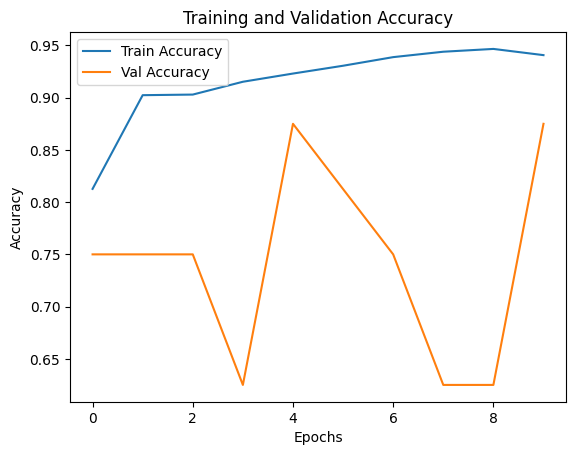

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [19]:
# Confusion Matrix & Classification Report

In [20]:
y_pred = (model.predict(test_generator) > 0.5).astype(int)
y_true = test_generator.classes

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

# Save the model
model.save('pneumonia_cnn_model.h5')

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step
[[201  33]
 [ 18 372]]


              precision    recall  f1-score   support

           0       0.92      0.86      0.89       234
           1       0.92      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624



In [21]:
# Confusion Matrix & Classification Report

In [22]:
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_generator.classes

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step
[[201  33]
 [ 18 372]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       234
           1       0.92      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624



In [23]:
# Precision-Recall Curve